In [27]:
%matplotlib inline
import pandas as pd

census = pd.read_csv('./acs2015_county_data.csv')
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [25]:
census.isnull().sum(axis = 0)


CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [26]:
census_missing = census.dropna()

In [5]:
census_columns = [col for col in census_missing.columns.values if col not in ['CensusId', 'State', 'County']]


In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
len(census_columns)

34

In [7]:
census_clusters = kmeans.fit(census_missing[census_columns])
census_clusters.cluster_centers_


array([[4.91636213e+04, 2.43276000e+04, 2.48360213e+04, 1.05735632e+01,
        7.64456486e+01, 8.37155993e+00, 1.79891626e+00, 9.33431856e-01,
        6.59113300e-02, 3.63820558e+04, 4.52640923e+04, 2.96395468e+03,
        2.35384269e+04, 1.41439048e+03, 1.76698851e+01, 2.44180296e+01,
        3.05360263e+01, 1.83735304e+01, 2.20772085e+01, 1.29872250e+01,
        1.60262726e+01, 7.94217077e+01, 1.03420033e+01, 6.63908046e-01,
        3.34440066e+00, 1.59431856e+00, 4.63448276e+00, 2.30822660e+01,
        2.17587507e+04, 7.38585878e+01, 1.77766174e+01, 8.06781609e+00,
        2.96748768e-01, 8.08042693e+00],
       [2.59497053e+06, 1.27467168e+06, 1.32029884e+06, 3.28736842e+01,
        3.98684211e+01, 1.44368421e+01, 3.31578947e-01, 9.75789474e+00,
        1.89473684e-01, 1.65020984e+06, 5.85898947e+04, 4.97473684e+02,
        3.08353158e+04, 2.48105263e+02, 1.68368421e+01, 2.35842105e+01,
        3.71842105e+01, 1.95105263e+01, 2.45473684e+01, 8.02631579e+00,
        1.07368421e+01,

In [33]:
census_missing['Cluster'] = census_clusters.fit_predict(census_missing[census_columns])


In [34]:
census_missing.Cluster.value_counts()


0    3045
3     153
1      19
2       1
Name: Cluster, dtype: int64

In [35]:
census_missing[census_missing.Cluster == 0].State.value_counts()


Texas             241
Georgia           155
Virginia          130
Kentucky          119
Missouri          113
Kansas            103
Iowa               98
North Carolina     97
Illinois           97
Tennessee          92
Nebraska           92
Indiana            90
Minnesota          84
Ohio               82
Mississippi        82
Puerto Rico        78
Michigan           78
Oklahoma           75
Arkansas           74
Wisconsin          69
South Dakota       66
Alabama            65
Louisiana          62
Colorado           59
Pennsylvania       58
Montana            56
West Virginia      55
Florida            53
North Dakota       53
New York           51
South Carolina     44
Idaho              43
California         37
Washington         34
Oregon             33
New Mexico         32
Alaska             29
Utah               27
Wyoming            23
Maryland           19
Maine              16
Nevada             15
Vermont            14
Arizona            13
New Jersey         10
New Hampsh

In [40]:
census_missing[census_missing.Cluster == 1]


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Cluster
103,4013,Arizona,Maricopa,4018143,1986158,2031985,30.1,57.3,4.9,1.6,...,2.6,5.9,25.5,1821038,82.5,11.7,5.7,0.2,7.7,1
215,6059,California,Orange,3116069,1539600,1576469,34.2,42.4,1.5,0.2,...,2.1,5.2,26.8,1508753,81.8,10.2,7.8,0.2,7.6,1
218,6065,California,Riverside,2298032,1143477,1154555,47.0,37.8,5.9,0.4,...,1.6,5.2,32.4,920603,77.1,14.9,7.8,0.2,12.9,1
221,6071,California,San Bernardino,2094769,1042053,1052716,51.1,31.2,8.1,0.4,...,1.2,4.2,30.4,829145,76.4,16.7,6.7,0.2,12.6,1
222,6073,California,San Diego,3223096,1618945,1604151,32.9,47.0,4.7,0.4,...,2.0,6.8,25.0,1462130,77.3,14.8,7.7,0.2,8.7,1
228,6085,California,Santa Clara,1868149,939004,929145,26.6,33.6,2.4,0.2,...,3.2,4.6,26.3,915619,84.3,9.3,6.4,0.1,7.7,1
325,12011,Florida,Broward,1843152,894820,948332,27.0,40.4,26.9,0.2,...,2.0,4.9,27.8,890997,82.2,11.3,6.4,0.1,10.0,1
362,12086,Florida,Miami-Dade,2639042,1280221,1358821,65.6,15.1,16.8,0.1,...,1.9,4.3,29.9,1204871,81.9,10.2,7.7,0.2,10.0,1
610,17031,Illinois,Cook,5236393,2537245,2699148,24.7,43.1,23.7,0.1,...,2.2,4.2,32.3,2463655,83.9,11.5,4.5,0.1,10.7,1
1312,26163,Michigan,Wayne,1778969,855112,923857,5.5,49.8,39.2,0.3,...,1.5,2.8,25.1,696900,86.1,10.0,3.8,0.1,14.9,1


In [39]:
census_missing[census_missing.Cluster == 2].head()


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Cluster
204,6037,California,Los Angeles,10038388,4945351,5093037,48.2,26.9,8.0,0.2,...,2.3,5.1,30.0,4635465,79.0,11.5,9.4,0.2,10.0,2


In [41]:
census_missing[census_missing.Cluster == 3]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Cluster
36,1073,Alabama,Jefferson,659026,311581,347445,3.8,51.0,42.2,0.2,...,1.0,2.5,23.6,293202,80.9,14.4,4.6,0.2,9.1,3
48,1097,Alabama,Mobile,414251,198216,216035,2.6,58.1,35.0,0.6,...,0.8,3.7,24.4,170900,81.4,13.8,4.6,0.1,9.8,3
106,4019,Arizona,Pima,998537,491108,507429,35.7,53.7,3.3,2.4,...,3.7,4.6,24.4,422371,74.9,18.3,6.6,0.2,10.0,3
170,5119,Arkansas,Pulaski,390463,187292,203171,5.9,54.2,35.4,0.3,...,1.1,2.9,20.3,180430,74.6,20.6,4.7,0.2,7.5,3
186,6001,California,Alameda,1584983,776699,808284,22.6,33.0,11.3,0.3,...,3.5,5.6,30.7,778132,78.7,13.8,7.4,0.1,8.3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,53061,Washington,Snohomish,746653,374847,371806,9.5,72.5,2.5,0.9,...,1.6,5.1,30.6,367655,81.6,12.7,5.5,0.2,7.5,3
2984,53063,Washington,Spokane,480832,238241,242591,5.1,85.7,1.7,1.3,...,1.6,5.4,21.2,211522,78.4,15.5,6.0,0.2,8.4,3
3059,55025,Wisconsin,Dane,510198,252850,257348,6.2,80.8,5.0,0.2,...,3.5,4.6,21.0,287151,74.2,21.1,4.5,0.1,4.9,3
3087,55079,Wisconsin,Milwaukee,955939,461804,494135,14.0,53.2,26.1,0.5,...,1.5,3.0,22.5,445174,84.8,11.7,3.4,0.1,9.3,3


In [44]:
census_missing.groupby(['Cluster'])['White'].mean()

Cluster
0    76.445649
1    39.868421
2    26.900000
3    60.396732
Name: White, dtype: float64

In [43]:
census_missing.groupby(['Cluster'])['ChildPoverty'].mean()

Cluster
0    24.418030
1    23.584211
2    25.800000
3    19.681046
Name: ChildPoverty, dtype: float64

In [62]:
from sklearn.cluster import AgglomerativeClustering

census_sample = census_missing[census_columns].sample(n=50)
hier_clust = AgglomerativeClustering(linkage='ward')
census_hier = hier_clust.fit(census_sample)



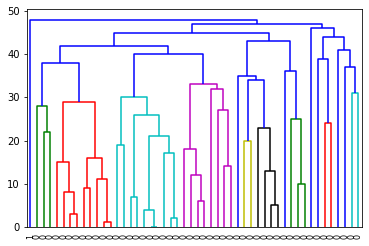

In [63]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(census_hier, labels=census_hier.labels_)
